In [274]:
import numpy as np
import pandas as pd

In [275]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

In [276]:
#Get both Vancouver and Toronta postcode data from Wikipedia and extract the table for postcode

vancouver_data=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V').text

In [277]:
!pip install bs4

In [278]:
from bs4 import BeautifulSoup

In [279]:
soupvancouver=BeautifulSoup(vancouver_data,'html.parser')

In [280]:
tablevancouver_contents=[]

In [281]:
vancouvertable=soupvancouver.find('table')

In [282]:
vancouvertable

<table class="wikitable sortable">
<tbody><tr>
<td valign="top" width="11.1%"><b>V1A</b><br/><span style="font-size: smaller; line-height: 125%;"><a href="/wiki/Kimberley,_British_Columbia" title="Kimberley, British Columbia">Kimberley</a></span>
</td>
<td valign="top" width="11.1%"><b>V2A</b><br/><span style="font-size: smaller; line-height: 125%;"><a href="/wiki/Penticton" title="Penticton">Penticton</a></span>
</td>
<td valign="top" width="11.1%"><b>V3A</b><br/><span style="font-size: smaller; line-height: 125%;"><a href="/wiki/Langley,_British_Columbia_(district_municipality)" title="Langley, British Columbia (district municipality)">Langley Township</a><br/>(Langley City)</span>
</td>
<td valign="top" width="11.1%"><b>V4A</b><br/><span style="font-size: smaller; line-height: 125%;"><a href="/wiki/Surrey,_British_Columbia" title="Surrey, British Columbia">Surrey</a><br/>Southwest</span>
</td>
<td valign="top" width="11.1%"><b>V5A</b><br/><span style="font-size: smaller; line-height

In [283]:
for row in vancouvertable.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.b.text
        cell['Borough'] = (row.span.text).split('(')[0]
        tablevancouver_contents.append(cell)

In [284]:
tablevancouver_contents


[{'Postal Code': 'V1A', 'Borough': 'Kimberley'},
 {'Postal Code': 'V2A', 'Borough': 'Penticton'},
 {'Postal Code': 'V3A', 'Borough': 'Langley Township'},
 {'Postal Code': 'V4A', 'Borough': 'SurreySouthwest'},
 {'Postal Code': 'V5A', 'Borough': 'Burnaby'},
 {'Postal Code': 'V6A', 'Borough': 'Vancouver'},
 {'Postal Code': 'V7A', 'Borough': 'RichmondSouth'},
 {'Postal Code': 'V8A', 'Borough': 'Powell River'},
 {'Postal Code': 'V9A', 'Borough': 'Victoria'},
 {'Postal Code': 'V1B', 'Borough': 'VernonEast'},
 {'Postal Code': 'V2B', 'Borough': 'KamloopsNorthwest'},
 {'Postal Code': 'V3B', 'Borough': 'Port CoquitlamCentral'},
 {'Postal Code': 'V4B', 'Borough': 'White Rock'},
 {'Postal Code': 'V5B', 'Borough': 'Burnaby'},
 {'Postal Code': 'V6B', 'Borough': 'Vancouver'},
 {'Postal Code': 'V7B', 'Borough': 'Richmond'},
 {'Postal Code': 'V8B', 'Borough': 'Squamish'},
 {'Postal Code': 'V9B', 'Borough': 'Victoria'},
 {'Postal Code': 'V1C', 'Borough': 'Cranbrook'},
 {'Postal Code': 'V2C', 'Borough': 

In [285]:
dfvancouver=pd.DataFrame(tablevancouver_contents)
dfvancouver.shape

(175, 2)

In [286]:
toronto_data=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [287]:
souptoronto=BeautifulSoup(toronto_data,'html.parser')

In [288]:
tabletoronto=souptoronto.find('table')

In [289]:
tabletoronto_contents=[]

In [290]:
for row in tabletoronto.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        tabletoronto_contents.append(cell)

In [291]:
tabletoronto_contents

[{'Postal Code': 'M3A', 'Borough': 'North York'},
 {'Postal Code': 'M4A', 'Borough': 'North York'},
 {'Postal Code': 'M5A', 'Borough': 'Downtown Toronto'},
 {'Postal Code': 'M6A', 'Borough': 'North York'},
 {'Postal Code': 'M7A', 'Borough': "Queen's Park"},
 {'Postal Code': 'M9A', 'Borough': 'Etobicoke'},
 {'Postal Code': 'M1B', 'Borough': 'Scarborough'},
 {'Postal Code': 'M3B', 'Borough': 'North York'},
 {'Postal Code': 'M4B', 'Borough': 'East York'},
 {'Postal Code': 'M5B', 'Borough': 'Downtown Toronto'},
 {'Postal Code': 'M6B', 'Borough': 'North York'},
 {'Postal Code': 'M9B', 'Borough': 'Etobicoke'},
 {'Postal Code': 'M1C', 'Borough': 'Scarborough'},
 {'Postal Code': 'M3C', 'Borough': 'North York'},
 {'Postal Code': 'M4C', 'Borough': 'East York'},
 {'Postal Code': 'M5C', 'Borough': 'Downtown Toronto'},
 {'Postal Code': 'M6C', 'Borough': 'York'},
 {'Postal Code': 'M9C', 'Borough': 'Etobicoke'},
 {'Postal Code': 'M1E', 'Borough': 'Scarborough'},
 {'Postal Code': 'M4E', 'Borough': 'Ea

In [292]:
dftoronto=pd.DataFrame(tabletoronto_contents)
dftoronto.head()

,Postal Code,Borough
0,M3A,North York
1,M4A,North York
2,M5A,Downtown Toronto
3,M6A,North York
4,M7A,Queen's Park


In [293]:
postcodetoronto=dftoronto["Postal Code"]
len(postcodetoronto)

103

In [294]:
postcodetoronto

0      M3A
1      M4A
2      M5A
3      M6A
4      M7A
      ... 
98     M8X
99     M4Y
100    M7Y
101    M8Y
102    M8Z
Name: Postal Code, Length: 103, dtype: object

In [295]:
! pip install pgeocode

In [296]:
import pgeocode

In [297]:
#test how we can get Latitude and Longtitude info. from pgeocode
nomi = pgeocode.Nominatim('ca')
latlng=nomi.query_postal_code(postcodetoronto[3])
latlng

postal_code                                                  M6A
country_code                                                  CA
place_name        North York (Lawrence Manor / Lawrence Heights)
state_name                                               Ontario
state_code                                                    ON
county_name                                          North York 
county_code                                                  NaN
community_name                                               NaN
community_code                                               NaN
latitude                                                 43.7223
longitude                                               -79.4504
accuracy                                                       6
Name: 0, dtype: object

In [298]:
Torontodata=pd.DataFrame(columns=["Latitude","Longitude"])

In [299]:
for i in range(len(postcodetoronto)):
 latlng=nomi.query_postal_code(postcodetoronto[i])
 Torontodata=Torontodata.append({'Latitude': latlng[9], 'Longitude': latlng[10]}, ignore_index=True)

In [300]:
 Torontodata

,Latitude,Longitude
0,43.7545,-79.3300
1,43.7276,-79.3148
2,43.6555,-79.3626
3,43.7223,-79.4504
4,43.6641,-79.3889
...,...,...
98,43.6518,-79.5076
99,43.6656,-79.3830
100,43.7804,-79.2505
101,43.6325,-79.4939


In [301]:
#since we are comparing where my friend live now in M6G, so pick M6G data only from Toronto data
dftoronto["Latitude"]=Torontodata["Latitude"]
dftoronto['Longitude']=Torontodata["Longitude"]
dftoronto=dftoronto[dftoronto['Postal Code'].str.contains("M6G")].reset_index(drop=True)
dftoronto.head()

,Postal Code,Borough,Latitude,Longitude
0,M6G,Downtown Toronto,43.6683,-79.4205


In [302]:
postcodevancouver=dfvancouver["Postal Code"]
vancouverdata=pd.DataFrame(columns=["Latitude","Longitude"])
for i in range(len(postcodevancouver)):
 latlng=nomi.query_postal_code(postcodevancouver[i])
 vancouverdata=vancouverdata.append({'Latitude': latlng[9], 'Longitude': latlng[10]}, ignore_index=True)
dfvancouver["Latitude"]=vancouverdata["Latitude"]
dfvancouver['Longitude']=vancouverdata["Longitude"]
dfvancouver=dfvancouver[dfvancouver['Borough'].str.contains("Vancouver")].reset_index(drop=True)
dfvancouver.shape
dfvancouver.head()

,Postal Code,Borough,Latitude,Longitude
0,V6A,Vancouver,49.2779,-123.0908
1,V6B,Vancouver,49.2788,-123.1139
2,V6C,Vancouver,49.2866,-123.1158
3,V6E,Vancouver,49.2833,-123.1298
4,V6G,Vancouver,49.2990,-123.1408


In [303]:
#Combine Toronto and Vancouver data

dftandv=dftoronto.append(dfvancouver)
dftandv.shape

(45, 4)

In [304]:
#Get venue information for the listed postcode
CLIENT_ID = 'S4YDHP5STXFEX2WMPZR52UJFVYSE0RRNI1XKKZNZLFPAJYK4' # your Foursquare ID
CLIENT_SECRET = 'K0DEMAVNRL1W31CH0XICNYCZAUPAQSL4SOW5YSJG5FBLXTGX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [305]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [306]:
tandvvenues = getNearbyVenues(names=dftandv['Postal Code'],
                                   latitudes=dftandv['Latitude'],
                                   longitudes=dftandv['Longitude']
                                  )

M6G
V6A
V6B
V6C
V6E
V6G
V7G
V6H
V7H
V6J
V7J
V5K
V6K
V7K
V5L
V6L
V7L
V5M
V6M
V7M
V5N
V6N
V7N
V5P
V6P
V7P
V5R
V6R
V7R
V5S
V6S
V7S
V5T
V6T
V7T
V5V
V7V
V5W
V7W
V5X
V7X
V5Y
V7Y
V5Z
V6Z


In [307]:
tandvvenues.head()

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M6G,43.6683,-79.4205,Fiesta Farms,43.668471,-79.420485,Grocery Store
1,M6G,43.6683,-79.4205,Scout and Cash Caffe,43.667360,-79.419938,Café
2,M6G,43.6683,-79.4205,Contra Cafe,43.669107,-79.426105,Café
3,M6G,43.6683,-79.4205,Christie Pits Park,43.664177,-79.420466,Park
4,M6G,43.6683,-79.4205,Karma Co-operative,43.668185,-79.414504,Grocery Store


In [308]:
tandvvenues.shape

(796, 7)

In [309]:
group=tandvvenues.groupby('Postcode').count()
#how many venue generated for that postcode
group.reset_index()

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M6G,12,12,12,12,12,12
1,V5K,27,27,27,27,27,27
2,V5L,30,30,30,30,30,30
3,V5M,23,23,23,23,23,23
4,V5N,17,17,17,17,17,17
5,V5P,20,20,20,20,20,20
6,V5R,6,6,6,6,6,6
7,V5S,15,15,15,15,15,15
8,V5T,25,25,25,25,25,25
9,V5V,15,15,15,15,15,15


In [310]:
group2=group.iloc[:, [2]].reset_index()

In [311]:
group2['Postcode']

0     M6G
1     V5K
2     V5L
3     V5M
4     V5N
5     V5P
6     V5R
7     V5S
8     V5T
9     V5V
10    V5W
11    V5X
12    V5Y
13    V5Z
14    V6A
15    V6B
16    V6C
17    V6E
18    V6G
19    V6H
20    V6J
21    V6K
22    V6L
23    V6M
24    V6N
25    V6P
26    V6R
27    V6S
28    V6Z
29    V7J
30    V7K
31    V7L
32    V7M
33    V7N
34    V7P
35    V7R
36    V7T
37    V7V
38    V7W
39    V7X
40    V7Y
Name: Postcode, dtype: object

In [312]:
import matplotlib.pyplot as plt
import matplotlib

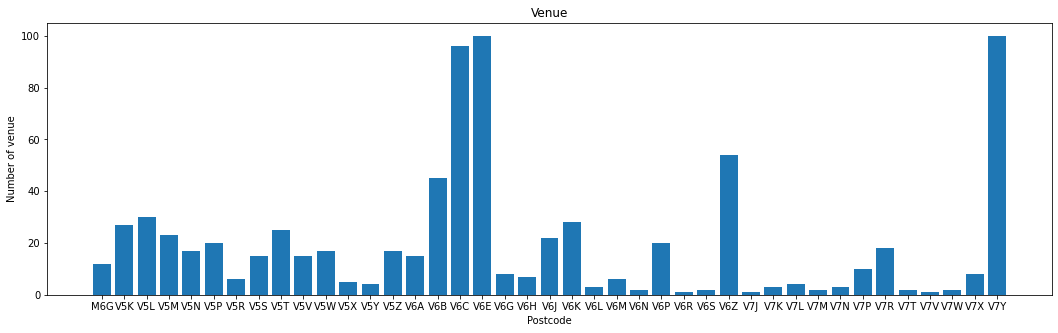

In [313]:
#see how many venues infomation for each postcode

f, ax = plt.subplots(figsize=(18,5))
plt.bar(group2['Postcode'],group2['Venue'])
plt.title('Venue')
plt.xlabel('Postcode')
plt.ylabel('Number of venue')
plt.show()


In [314]:
#only select postcodes with larger than 5 venue information, as lack of sufficient venue info. no meaning to include in exericse
group3 = group2[group2['Venue']>=5]
selectedcode=group3["Postcode"]
selectedcode

0     M6G
1     V5K
2     V5L
3     V5M
4     V5N
5     V5P
6     V5R
7     V5S
8     V5T
9     V5V
10    V5W
11    V5X
13    V5Z
14    V6A
15    V6B
16    V6C
17    V6E
18    V6G
19    V6H
20    V6J
21    V6K
23    V6M
25    V6P
28    V6Z
34    V7P
35    V7R
39    V7X
40    V7Y
Name: Postcode, dtype: object

In [315]:
tandvvenues= tandvvenues[tandvvenues.Postcode.isin(selectedcode)]
tandvvenues

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M6G,43.6683,-79.4205,Fiesta Farms,43.668471,-79.420485,Grocery Store
1,M6G,43.6683,-79.4205,Scout and Cash Caffe,43.667360,-79.419938,Café
2,M6G,43.6683,-79.4205,Contra Cafe,43.669107,-79.426105,Café
3,M6G,43.6683,-79.4205,Christie Pits Park,43.664177,-79.420466,Park
4,M6G,43.6683,-79.4205,Karma Co-operative,43.668185,-79.414504,Grocery Store
...,...,...,...,...,...,...,...
791,V6Z,49.2767,-123.1300,La Lotus Nail Spa,49.276685,-123.125524,Spa
792,V6Z,49.2767,-123.1300,Chancho Tortilleria,49.276241,-123.125082,Taco Place
793,V6Z,49.2767,-123.1300,Shoppers Drug Mart,49.280865,-123.131550,Pharmacy
794,V6Z,49.2767,-123.1300,False Creek Ferry,49.274953,-123.136082,Boat or Ferry


In [316]:
tandvvenues.shape

(766, 7)

In [317]:
#this is really high dimension data with 183 unique categories

print('There are {} uniques categories.'.format(len(tandvvenues['Venue Category'].unique())))

There are 183 uniques categories.


In [318]:
onehot = pd.get_dummies(tandvvenues[['Venue Category']], prefix="", prefix_sep="")
onehot.head()

,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Baby Store,...,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
onehot.shape

(766, 183)

In [320]:
onehot.columns

Index(['Accessories Store', 'Airport Terminal', 'American Restaurant',
       'Amphitheater', 'Art Gallery', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'Australian Restaurant',
       'Baby Store',
       ...
       'Toy / Game Store', 'Trade School', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant',
       'Warehouse Store', 'Wine Shop', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=183)

In [321]:
onehot['Postcode']=tandvvenues['Postcode']
onehot.head()

,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Baby Store,...,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio,Postcode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M6G
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M6G
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M6G
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M6G
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M6G


In [322]:
# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
fixed_columns

['Postcode',
 'Accessories Store',
 'Airport Terminal',
 'American Restaurant',
 'Amphitheater',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Beach',
 'Beer Garden',
 'Belgian Restaurant',
 'Boat or Ferry',
 'Bookstore',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cantonese Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Cruise Ship',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 'Discount Store',
 'Dog Run',
 'Donut Shop',
 'Electronics Store',
 'Ethiopian Restaurant',
 'Event Service',
 'Event Space',
 'Fair',
 'Falafel Restaurant',
 '

In [323]:
onehot = onehot[fixed_columns]

onehot.head()

,Postcode,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,M6G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M6G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M6G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M6G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M6G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
#let’s group rows by postcode and by taking the mean of the frequency of occurrence of each category
onehotgrouped =onehot.groupby('Postcode').mean().reset_index()
onehotgrouped

,Postcode,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,M6G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,V5K,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.00,0.000000
2,V5L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.000000
3,V5M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.00,0.000000
4,V5N,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,V5P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.00,0.000000
6,V5R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,V5S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,V5T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.00,0.000000
9,V5V,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000


In [325]:
#sort venue in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [326]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['Postcode'] = onehotgrouped['Postcode']

for ind in np.arange(onehotgrouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(onehotgrouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6G,Grocery Store,Café,Park,Playground,Candy Store,Athletics & Sports,Baby Store,Coffee Shop,Farm,Fish & Chips Shop
1,V5K,Park,Event Space,Theme Park Ride / Attraction,Theme Park,Beer Garden,Gas Station,Sushi Restaurant,Sandwich Place,Bus Station,Farm
2,V5L,Italian Restaurant,Deli / Bodega,Chinese Restaurant,Brewery,Coffee Shop,Theater,Café,Indian Restaurant,Fish & Chips Shop,Electronics Store
3,V5M,Bus Stop,Coffee Shop,Pizza Place,Metro Station,Mexican Restaurant,Shop & Service,Sandwich Place,Liquor Store,Chinese Restaurant,Storage Facility
4,V5N,Bakery,Café,Park,Skating Rink,Dog Run,Church,Bookstore,Farmers Market,Concert Hall,Beach


In [327]:
from sklearn.cluster import KMeans

In [328]:

tandvclustering= onehotgrouped.drop('Postcode', 1)

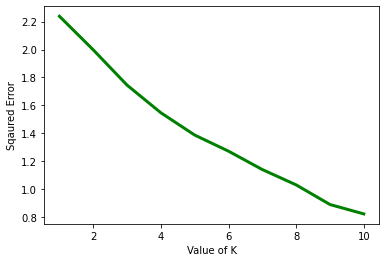

In [382]:
squarederror =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(tandvclustering)
      
    # calculates squared error
    # for the clustered points
    squarederror.append(KM.inertia_)     

plt.plot(range(1, 11), squarederror, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error")
plt.show() # clear the plot


In [383]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(tandvclustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:33] 

array([4, 0, 3, 3, 0, 3, 2, 1, 3, 4, 1, 5, 4, 3, 3, 3, 3, 0, 0, 3, 3, 1,
       1, 3, 4, 0, 0, 3])

In [330]:
# add clustering labels
postcode_venues_sorted.insert(0, 'KmeanClusterLabel', kmeans.labels_)

postcode_venues_sorted

,KmeanClusterLabel,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,M6G,Grocery Store,Café,Park,Playground,Candy Store,Athletics & Sports,Baby Store,Coffee Shop,Farm,Fish & Chips Shop
1,0,V5K,Park,Event Space,Theme Park Ride / Attraction,Theme Park,Beer Garden,Gas Station,Sushi Restaurant,Sandwich Place,Bus Station,Farm
2,3,V5L,Italian Restaurant,Deli / Bodega,Chinese Restaurant,Brewery,Coffee Shop,Theater,Café,Indian Restaurant,Fish & Chips Shop,Electronics Store
3,3,V5M,Bus Stop,Coffee Shop,Pizza Place,Metro Station,Mexican Restaurant,Shop & Service,Sandwich Place,Liquor Store,Chinese Restaurant,Storage Facility
4,0,V5N,Bakery,Café,Park,Skating Rink,Dog Run,Church,Bookstore,Farmers Market,Concert Hall,Beach
5,3,V5P,Pizza Place,Fish Market,Bus Stop,Middle Eastern Restaurant,Liquor Store,Restaurant,Fried Chicken Joint,Sushi Restaurant,Convenience Store,Bank
6,2,V5R,Bar,Hotel,Bus Stop,Park,Asian Restaurant,Fish & Chips Shop,Yoga Studio,Food & Drink Shop,Fish Market,Financial or Legal Service
7,1,V5S,Juice Bar,Bank,Shopping Mall,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Salon / Barbershop,Liquor Store,Farmers Market,Sushi Restaurant
8,3,V5T,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Pharmacy,Park,Music Venue,Pizza Place,Convenience Store,Cocktail Bar,Pub
9,4,V5V,Coffee Shop,Ice Cream Shop,Breakfast Spot,Grocery Store,Greek Restaurant,Filipino Restaurant,Convenience Store,Sandwich Place,Café,Pizza Place


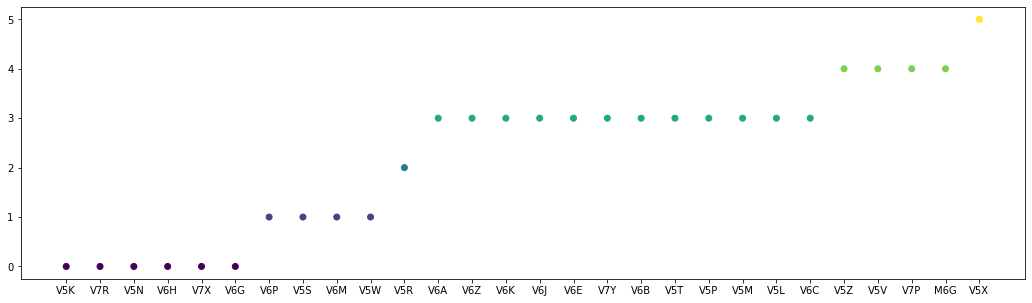

In [331]:
#let's visualize the clusters for postcodes
sortforcharts=postcode_venues_sorted.sort_values(by=['KmeanClusterLabel'])
f, ax = plt.subplots(figsize=(18,5))
plt.scatter(sortforcharts['Postcode'],sortforcharts['KmeanClusterLabel'],c=sortforcharts['KmeanClusterLabel'])
plt.show()

In [332]:
#let's see which postcodes is in the same cluster as where my friends lives - M6G
M6GClusterKmean=postcode_venues_sorted[postcode_venues_sorted.KmeanClusterLabel==4]
M6GClusterKmean['Postcode']

0     M6G
9     V5V
12    V5Z
24    V7P
Name: Postcode, dtype: object

In [333]:
#let's try another hierarchical
from sklearn.cluster import AgglomerativeClustering

In [374]:
Hierarchical= AgglomerativeClustering(n_clusters=6, affinity='euclidean')
Hierarchical.fit(tandvclustering)

AgglomerativeClustering(n_clusters=6)

In [335]:
Hierarchical.labels_

array([1, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 4, 0, 0, 0, 2,
       0, 0, 1, 4, 0, 0], dtype=int64)

In [336]:
postcode_venues_sorted.insert(0, 'HierarchialClusterLabel', Hierarchical.labels_)


In [337]:
sortforcharts2=postcode_venues_sorted.sort_values(by=['HierarchialClusterLabel'])

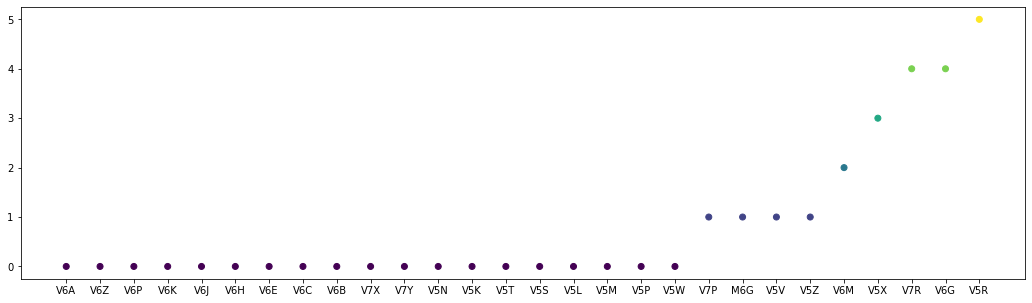

In [338]:
f, ax = plt.subplots(figsize=(18,5))
plt.scatter(sortforcharts2['Postcode'],sortforcharts2['HierarchialClusterLabel'],c=sortforcharts2['HierarchialClusterLabel'])
plt.show()

In [339]:
#actually with 6 clusters, hierarchical method shows the same result for those postcode in same cluster as M6G.
M6GClusterHierarchial=postcode_venues_sorted[postcode_venues_sorted.HierarchialClusterLabel==1]
M6GClusterHierarchial['Postcode']

0     M6G
9     V5V
12    V5Z
24    V7P
Name: Postcode, dtype: object

In [340]:
#let's try Dbscaon
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()

In [341]:
#to see the closest distance among data points, to get the hint for epsilon
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(tandvclustering)
distances, indices = nbrs.kneighbors(tandvclustering)

In [342]:
distances

array([[0.        , 0.3768379 ],
       [0.        , 0.26204116],
       [0.        , 0.21684608],
       [0.        , 0.24734564],
       [0.        , 0.27556297],
       [0.        , 0.25099801],
       [0.        , 0.40265784],
       [0.        , 0.27406253],
       [0.        , 0.23916521],
       [0.        , 0.31175854],
       [0.        , 0.24045804],
       [0.        , 0.50497525],
       [0.        , 0.31175854],
       [0.        , 0.26220762],
       [0.        , 0.16378245],
       [0.        , 0.13082803],
       [0.        , 0.13424176],
       [0.        , 0.37525711],
       [0.        , 0.36007936],
       [0.        , 0.24901127],
       [0.        , 0.18256673],
       [0.        , 0.40960686],
       [0.        , 0.24045804],
       [0.        , 0.13424176],
       [0.        , 0.31112698],
       [0.        , 0.36687442],
       [0.        , 0.35293905],
       [0.        , 0.13082803]])

In [343]:
distances = np.sort(distances, axis=0)
distances

array([[0.        , 0.13082803],
       [0.        , 0.13082803],
       [0.        , 0.13424176],
       [0.        , 0.13424176],
       [0.        , 0.16378245],
       [0.        , 0.18256673],
       [0.        , 0.21684608],
       [0.        , 0.23916521],
       [0.        , 0.24045804],
       [0.        , 0.24045804],
       [0.        , 0.24734564],
       [0.        , 0.24901127],
       [0.        , 0.25099801],
       [0.        , 0.26204116],
       [0.        , 0.26220762],
       [0.        , 0.27406253],
       [0.        , 0.27556297],
       [0.        , 0.31112698],
       [0.        , 0.31175854],
       [0.        , 0.31175854],
       [0.        , 0.35293905],
       [0.        , 0.36007936],
       [0.        , 0.36687442],
       [0.        , 0.37525711],
       [0.        , 0.3768379 ],
       [0.        , 0.40265784],
       [0.        , 0.40960686],
       [0.        , 0.50497525]])

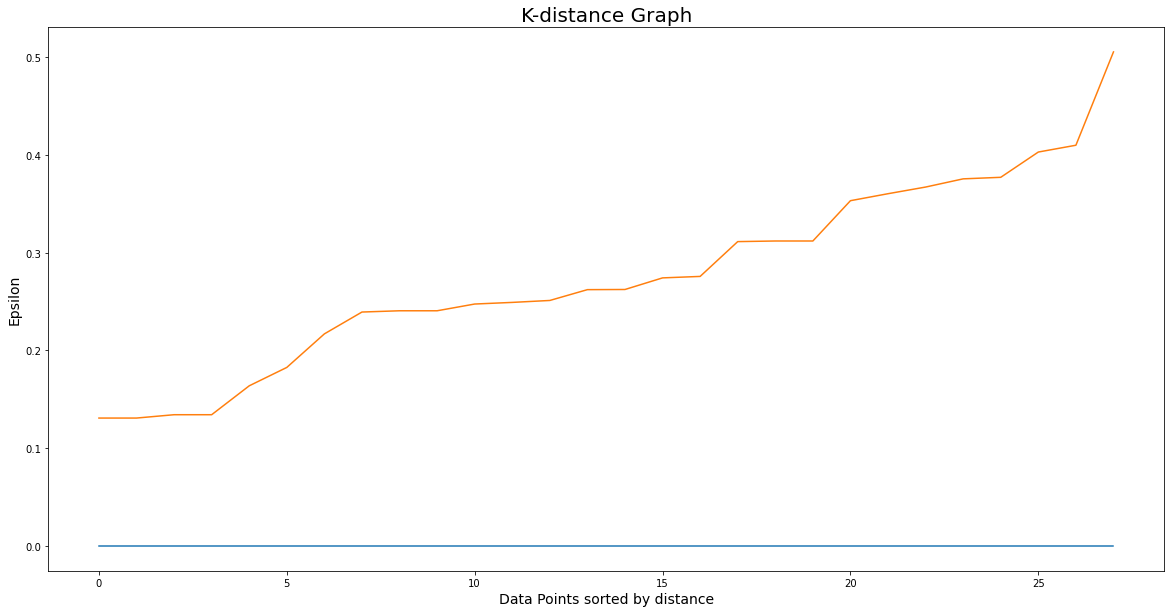

In [344]:
# Plotting K-distance Graph
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [345]:
#let's pick 0.4,at the point of maximum curvature in the K-Distance graph
dbscan_opt=DBSCAN(eps=0.4,min_samples=8)
dbscan_opt.fit(tandvclustering)

DBSCAN(eps=0.4, min_samples=8)

In [346]:
dbscan_opt.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0], dtype=int64)

In [347]:
n_clusters_ = len(set(dbscan_opt.labels_)) - (1 if -1 in dbscan_opt.labels_ else 0)
n_noise_ = list(dbscan_opt.labels_).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 3


In [348]:
postcode_venues_sorted.insert(0, 'DbscanLabel', dbscan_opt.labels_)

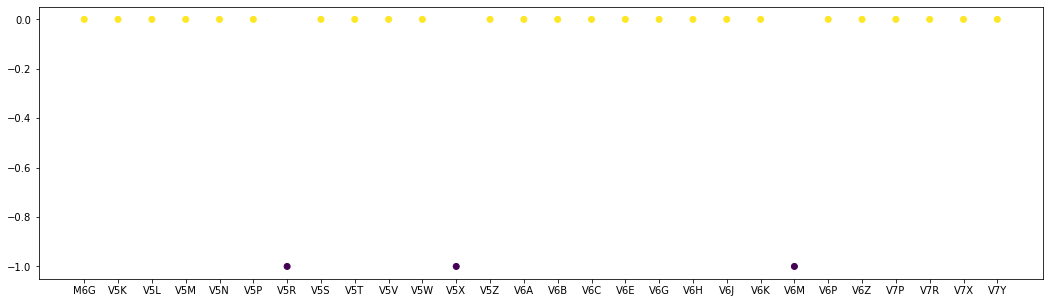

In [349]:
f, ax = plt.subplots(figsize=(18,5))
plt.scatter(postcode_venues_sorted['Postcode'],postcode_venues_sorted['DbscanLabel'],c=postcode_venues_sorted['DbscanLabel'])
plt.show()

In [350]:
#DBSCAN just list three as outliers and cluster the rest into one cluster
#but is that due to minpoints issue? let's try Bbscan by doing some dimension reduction

In [351]:

onehotPCA=onehotgrouped.drop(columns =['Postcode'])

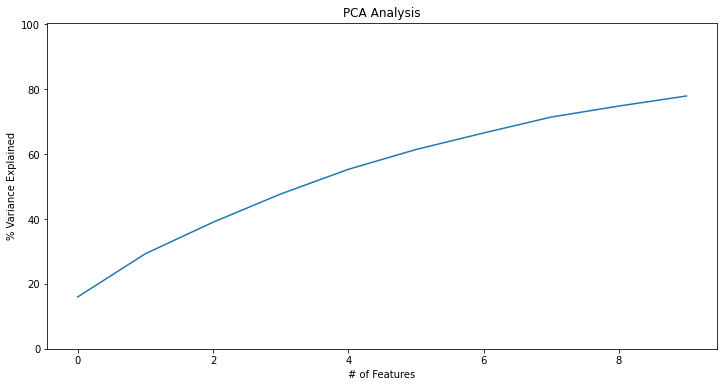

In [352]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(onehotPCA)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [353]:
#we see 8 components out of 183 venue category explains nearly 80% of variance
pca = PCA(n_components=8)
pca.fit(onehotPCA)
pca_scale = pca.transform(onehotPCA)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3',"pc4","pc5","pc6","pc7","pc8"])
print(pca.explained_variance_ratio_)
pca_df

[0.15996832 0.1334583  0.09681532 0.08653444 0.07592103 0.06079075
 0.05131627 0.04853207]


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-0.121609,-0.084173,0.084232,0.217815,-0.145266,-0.121886,0.069666,0.045747
1,-0.022481,0.026962,-0.055798,-0.010444,-0.032822,-0.030278,-0.001920,-0.044435
2,-0.000045,-0.034185,0.018699,-0.033925,-0.019353,-0.031000,0.008305,-0.023016
3,0.024372,-0.046097,0.019640,-0.014674,0.028864,0.010157,0.021891,-0.008358
4,-0.059922,0.005966,-0.060541,0.006133,-0.099193,-0.073420,0.041093,-0.049172
5,0.012606,0.044565,0.012429,-0.022583,-0.034919,-0.024226,0.024019,-0.045981
6,0.131861,0.108519,-0.045550,0.088338,-0.176940,0.236599,-0.073865,0.004497
7,0.058435,-0.056317,0.031664,0.005149,0.024936,-0.056564,-0.026732,-0.043073
8,-0.009645,-0.007681,-0.030068,-0.001277,-0.064367,-0.046218,-0.016211,-0.073960
9,-0.116515,-0.201500,0.122268,0.035903,0.079930,0.065576,0.007230,0.081708


In [354]:
neigh = NearestNeighbors(n_neighbors=2)
nbrspca = neigh.fit(pca_df)
distancespca, indicespca = nbrspca.kneighbors(pca_df)
distancespca= np.sort(distancespca, axis=0)
distancespca

array([[0.        , 0.03324881],
       [0.        , 0.03324881],
       [0.        , 0.04132588],
       [0.        , 0.04132588],
       [0.        , 0.06125259],
       [0.        , 0.06660371],
       [0.        , 0.06660371],
       [0.        , 0.07175426],
       [0.        , 0.07406924],
       [0.        , 0.07434924],
       [0.        , 0.07434924],
       [0.        , 0.08402147],
       [0.        , 0.08704577],
       [0.        , 0.08704577],
       [0.        , 0.09771625],
       [0.        , 0.09918992],
       [0.        , 0.14190949],
       [0.        , 0.15946441],
       [0.        , 0.15946441],
       [0.        , 0.18946089],
       [0.        , 0.23676151],
       [0.        , 0.23676151],
       [0.        , 0.26453818],
       [0.        , 0.32408417],
       [0.        , 0.32896154],
       [0.        , 0.3384777 ],
       [0.        , 0.35022935],
       [0.        , 0.46714153]])

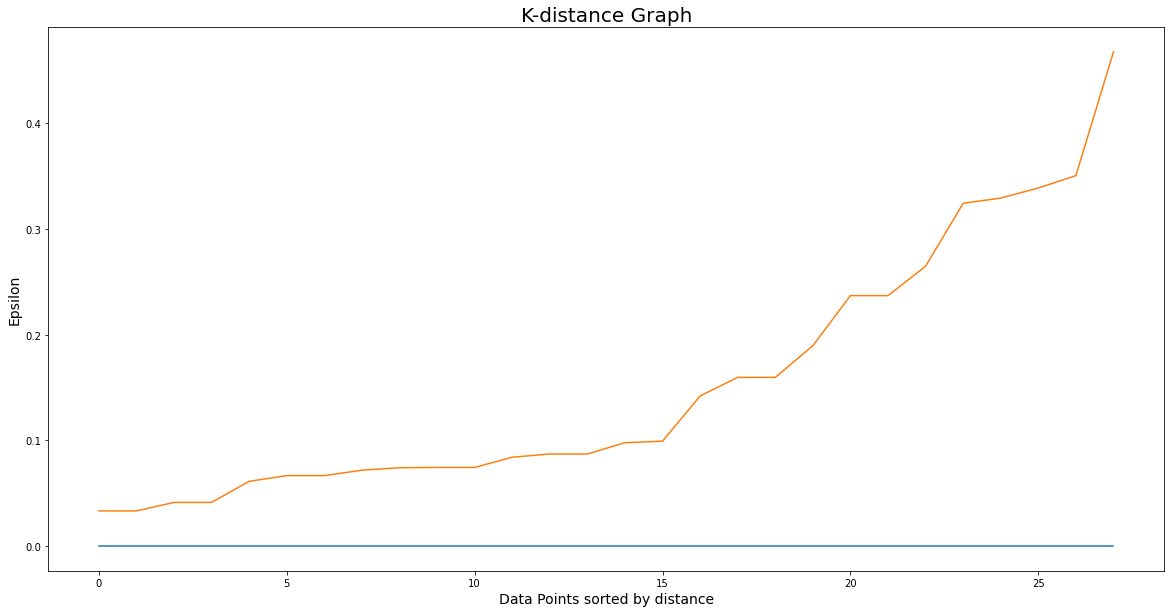

In [355]:
plt.figure(figsize=(20,10))
plt.plot(distancespca)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [356]:
#it still results in one cluster and 2 outliers.
dbpca = DBSCAN(eps=0.35, min_samples=8)
dbpca.fit(pca_df)
dbpca.labels_        

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [357]:
# situation does not improve, DBscan does have difficulty for high dimension numbers.
# Kmean and Hierarchical methoes yield better result.

In [366]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [364]:

dftandv.rename(columns = {'Postal Code':'Postcode'}, inplace = True)
postcodeformap = pd.merge(dftandv, postcode_venues_sorted, on='Postcode', how='inner')

postcodeformap.head() # check the last columns!

,Postcode,Borough,Latitude,Longitude,DbscanLabel,HierarchialClusterLabel,KmeanClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6G,Downtown Toronto,43.6683,-79.4205,0,1,4,Grocery Store,Café,Park,Playground,Candy Store,Athletics & Sports,Baby Store,Coffee Shop,Farm,Fish & Chips Shop
1,V6A,Vancouver,49.2779,-123.0908,0,0,3,Park,Grocery Store,Deli / Bodega,Coffee Shop,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Cheese Shop,Café
2,V6B,Vancouver,49.2788,-123.1139,0,0,3,Restaurant,Hotel,Coffee Shop,Concert Hall,Pizza Place,Taco Place,Breakfast Spot,Steakhouse,Food Truck,Spa
3,V6C,Vancouver,49.2866,-123.1158,0,0,3,Hotel,Coffee Shop,Restaurant,Café,Boat or Ferry,Hotel Bar,Food Truck,Steakhouse,Spa,Breakfast Spot
4,V6E,Vancouver,49.2833,-123.1298,0,0,3,Japanese Restaurant,Coffee Shop,Bakery,Dessert Shop,Gay Bar,Hotel,Mexican Restaurant,Food Truck,Italian Restaurant,Restaurant


In [369]:
address = 'Vancouver'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [370]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(postcodeformap['Latitude'], postcodeformap['Longitude'], postcodeformap['Postcode'], postcodeformap['KmeanClusterLabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters